In [1]:
import pygeostat as gs
import numpy as np
from matplotlib import pyplot as plt

<h1 style='color:#1B127A;'>
Calculating experimental CDF
</h1>

<h2 style='color:#5177F9;'>
Variable and weights setup
</h2>

In [7]:
var = np.random.normal(0, 1, 50)
weights = np.ones(var.shape)

weights = weights / np.sum(weights) # normalize weights to sum to 1 (unbiassed mean)

<h2 style='color:#5177F9;'>
CDF by Simple Cumulative Sum
</h2>

Calculate the experimental CDF as the average of the previous CDF and the newly incremented one

In [8]:
order = var.argsort()
midpoints = var[order]
cdf = np.cumsum(weights[order])

<h2 style='color:#5177F9;'>
CDF rolling average of cumulative sum
</h2>

This provides a representative experimental CDF as it does not consider the highest sample value the highest possible observation.

In [9]:
cps = []
cp_old = 0
cp = 0
for wt in weights[order]:
    cp = cp + wt
    cps.append((cp+cp_old)/2)
    cp_old = cp
cdf_rep= np.array(cps)

In [10]:
# or using numpy
cum = np.cumsum(weights[order])
cum_r = np.roll(cum,1)
cum_r[0] = 0.0
cdf_rep_np=np.mean([cum, cum_r], axis=0)

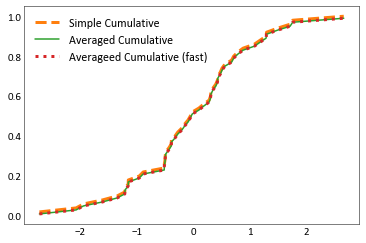

In [12]:
fig, ax = plt.subplots(1,1)
ax.plot(midpoints, cdf, ls='--', c='C1', lw=3, label='Simple Cumulative')
ax.plot(midpoints, cdf_rep, ls = '-', c='C2', label='Averaged Cumulative')
ax.plot(midpoints, cdf_rep_np, ls=':', c='C3', lw=3, label='Averageed Cumulative (fast)')
_ = ax.legend(fontsize=12)